<a href="https://colab.research.google.com/github/su92-msaiw-f25-016-spec/lessons-learned/blob/Machine_Learning_Project/Priceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**LOAD DATA**

In [26]:
data = pd.read_csv("price_classification_dataset.csv")

In [27]:
X = data[["price", "discount", "rating"]].values
y = data["label"].values

**RAW DATA VISUALIZATION**

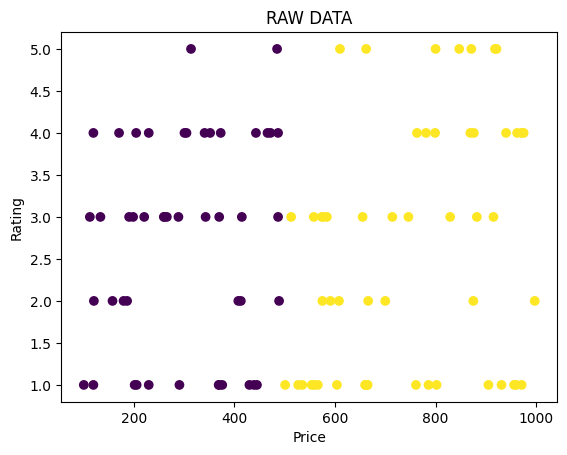

In [28]:
plt.figure()
plt.scatter(data["price"], data["rating"], c=data["label"])
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("RAW DATA")
plt.show()

In [29]:
# SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

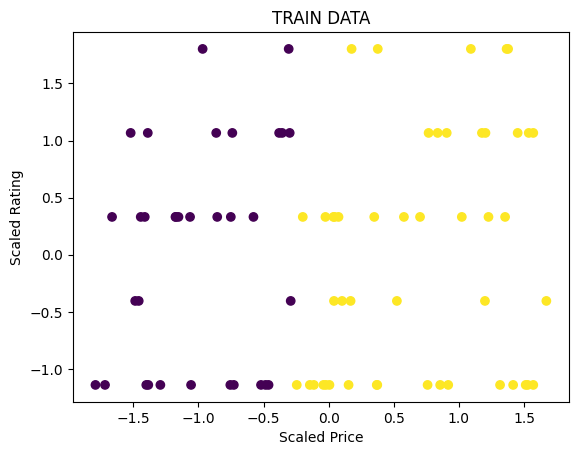

In [31]:
# TRAIN DATA VISUALIZATION
plt.figure()
plt.scatter(X_train[:,0], X_train[:,2], c=y_train)
plt.xlabel("Scaled Price")
plt.ylabel("Scaled Rating")
plt.title("TRAIN DATA")
plt.show()

In [32]:
# NUMPY To TENSOR
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [34]:
# MODEL
class PriceNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 8)
        self.fc2 = nn.Linear(8, 4)
        self.out = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.sigmoid(self.out(x))


In [35]:
model = PriceNN()

**LOSS**

In [36]:
criterion = nn.BCELoss()